# Imports

In [1]:
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pickle

data_dir = "logs/epoch_data/"
label_dir_orig = "data/ny/"
label_dir_repl = "data/paper_replication/"
label_dir_brook = "data/brooklyn_generalisation/"

# Data loading

## Original data

In [2]:
with open(label_dir_orig + "new_labels.pkl", "rb") as infile:
    labels = np.array(pickle.load(infile))

## Original model, original data

In [3]:
with open(data_dir + "2022-01-21_053031.pkl", "rb") as infile:
    requests_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_033809.pkl", "rb") as infile:
    income_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_055006.pkl", "rb") as infile:
    driver_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_070409.pkl", "rb") as infile:
    rider_50 = pickle.load(infile)

In [4]:
with open(data_dir + "2022-01-21_031618.pkl", "rb") as infile:
    requests_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_012838.pkl", "rb") as infile:
    income_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_114834.pkl", "rb") as infile:
    driver_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-21_105545.pkl", "rb") as infile:
    rider_200 = pickle.load(infile)

## Model without LSTM, original data

In [5]:
with open(data_dir + "2022-01-21_142420.pkl", "rb") as infile:
    requests_nolstm_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-22_003146.pkl", "rb") as infile:
    income_nolstm_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-22_024518.pkl", "rb") as infile:
    driver_nolstm_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-22_002914.pkl", "rb") as infile:
    rider_nolstm_50 = pickle.load(infile)

## Original model, replicated data

In [6]:
with open(label_dir_repl + "new_labels.pkl", "rb") as infile:
    labels_repl = np.array(pickle.load(infile))

In [7]:
with open(data_dir + "2022-02-01_021208.pkl", "rb") as infile:
    requests_repl_50 = pickle.load(infile)
    
with open(data_dir + "2022-02-01_091433.pkl", "rb") as infile:
    income_repl_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-31_173805.pkl", "rb") as infile:
    driver_repl_50 = pickle.load(infile)
    
with open(data_dir + "2022-01-31_123715.pkl", "rb") as infile:
    rider_repl_50 = pickle.load(infile)

In [8]:
with open(data_dir + "2022-01-31_231108.pkl", "rb") as infile:
    requests_repl_200 = pickle.load(infile)
    
with open(data_dir + "2022-02-01_072249.pkl", "rb") as infile:
    income_repl_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-31_223715.pkl", "rb") as infile:
    driver_repl_200 = pickle.load(infile)
    
with open(data_dir + "2022-01-31_155147.pkl", "rb") as infile:
    rider_repl_200 = pickle.load(infile)

## Original model, Brooklyn data

In [9]:
with open(label_dir_brook + "new_labels.pkl", "rb") as infile:
    labels_brook = np.array(pickle.load(infile))

In [10]:
with open(data_dir + "2022-02-02_123424_1_50.pkl", "rb") as infile:
    requests_brook_50_a = pickle.load(infile)
    
with open(data_dir + "2022-02-02_124320_1_50.pkl", "rb") as infile:
    requests_brook_50_b = pickle.load(infile)
    
with open(data_dir + "2022-02-03_023724_15_50.pkl", "rb") as infile:
    income_brook_50_a = pickle.load(infile)
    
with open(data_dir + "2022-02-03_024627_15_50.pkl", "rb") as infile:
    income_brook_50_b = pickle.load(infile)
    
with open(data_dir + "2022-02-02_091135_10_50.pkl", "rb") as infile:
    driver_brook_50_a = pickle.load(infile)
    
with open(data_dir + "2022-02-02_092047_10_50.pkl", "rb") as infile:
    driver_brook_50_b = pickle.load(infile)
    
with open(data_dir + "2022-02-01_233310_14_50.pkl", "rb") as infile:
    rider_brook_50_a = pickle.load(infile)
    
with open(data_dir + "2022-02-01_234046_14_50.pkl", "rb") as infile:
    rider_brook_50_b = pickle.load(infile)

In [11]:
with open(data_dir + "2022-02-02_105330_1_200.pkl", "rb") as infile:
    requests_brook_200_a = pickle.load(infile)
    
with open(data_dir + "2022-02-02_113626_1_200.pkl", "rb") as infile:
    requests_brook_200_b = pickle.load(infile)
    
with open(data_dir + "2022-02-03_005700_15_200.pkl", "rb") as infile:
    income_brook_200_a = pickle.load(infile)
    
with open(data_dir + "2022-02-03_014047_15_200.pkl", "rb") as infile:
    income_brook_200_b = pickle.load(infile)
    
with open(data_dir + "2022-02-02_213051_10_200.pkl", "rb") as infile:
    driver_brook_200_a = pickle.load(infile)
    
with open(data_dir + "2022-02-02_221419_10_200.pkl", "rb") as infile:
    driver_brook_200_b = pickle.load(infile)
    
with open(data_dir + "2022-02-02_072655_14_200.pkl", "rb") as infile:
    rider_brook_200_a = pickle.load(infile)
    
with open(data_dir + "2022-02-02_081158_14_200.pkl", "rb") as infile:
    rider_brook_200_b = pickle.load(infile)

# Functions

In [12]:
def get_success_rate_plot(stats, labels, plot_labels, n_drivers, lim_x=None, lim_y=None, statsb=None):
    for i, stat in enumerate(stats):
        total_ratio = stat['total_requests_accepted'] / sum(stat['epoch_requests_seen'])
        all_accepted_locations = list(itertools.chain(*stat["epoch_locations_accepted"]))
        all_accepted_neighborhoods = labels[all_accepted_locations]
        accepted_counter = Counter(all_accepted_neighborhoods)
        all_locations = list(itertools.chain(*stat["epoch_locations_all"]))
        all_neighborhoods = labels[all_locations]
        all_counter = Counter(all_neighborhoods)
        neighborhood_ratios = np.array([v for (k, v) in sorted(accepted_counter.items())]) / np.array([v for (k, v) in sorted(all_counter.items())])
        min_ratio = neighborhood_ratios.min()
        if statsb:
            total_ratiob = statsb[i]['total_requests_accepted'] / sum(statsb[i]['epoch_requests_seen'])
            total_ratio = np.mean([total_ratio, total_ratiob])
            all_accepted_locations = list(itertools.chain(*statsb[i]["epoch_locations_accepted"]))
            all_accepted_neighborhoods = labels[all_accepted_locations]
            accepted_counter = Counter(all_accepted_neighborhoods)
            all_locations = list(itertools.chain(*statsb[i]["epoch_locations_all"]))
            all_neighborhoods = labels[all_locations]
            all_counter = Counter(all_neighborhoods)
            neighborhood_ratios = np.array([v for (k, v) in sorted(accepted_counter.items())]) / np.array([v for (k, v) in sorted(all_counter.items())])
            min_ratiob = neighborhood_ratios.min()
            min_ratio = np.mean([min_ratio, min_ratiob])
        plt.plot(total_ratio, min_ratio, "*", label=plot_labels[i])
    plt.title(f"{n_drivers} Drivers")
    plt.xlabel("Overall Success Rate")
    plt.ylabel("Minimum Request Success Rate")
    plt.legend(loc="best")
    if lim_x:
        plt.xlim(lim_x)
    if lim_y:
        plt.ylim(lim_y)
    plt.show()    

In [13]:
def get_income_dist_plot(stats, plot_labels, n_drivers, lim_x=None, statsb=None):
    profits_per_agent = np.zeros((n_drivers, len(stats)))
    for i, stat in enumerate(stats):
        agent_profits = list(itertools.chain(*stat["epoch_each_agent_profit"]))
        for p in agent_profits:
            profits_per_agent[p[0], i] += p[1]
    if statsb:
        for i, stat in enumerate(statsb):
            agent_profits = list(itertools.chain(*stat["epoch_each_agent_profit"]))
            for p in agent_profits:
                profits_per_agent[p[0], i] += p[1]
    plt.boxplot(profits_per_agent, vert=False, labels=plot_labels)
    plt.title("Income by Objective Function")
    plt.xlabel("Payment ($)")
    plt.ylabel("Policy")
    if lim_x:
        plt.xlim(lim_x)
    plt.show()    

In [14]:
def get_total_income_bar_plot(stats, plot_labels, statsb=None):
    incs = []
    for i, stat in enumerate(stats):
        inc = sum(stat["epoch_requests_accepted_profit"])
        if statsb:
            inc = np.mean([inc, sum(statsb[i]["epoch_requests_accepted_profit"])])
        incs.append(inc)
    plt.bar(np.arange(len(stats)), incs)
    plt.title("Total income by Objective Function")
    plt.xticks(np.arange(len(stats)), plot_labels)
    plt.ylabel("Payment ($)")
    plt.show()

## Original model, original data

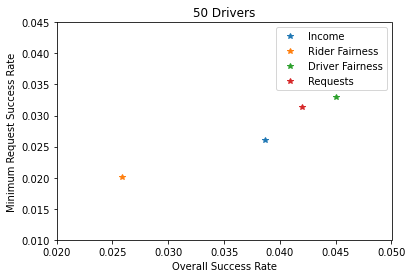

In [15]:
get_success_rate_plot([income_50, rider_50, driver_50, requests_50], labels, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50, (0.020, 0.050), (0.010, 0.045))

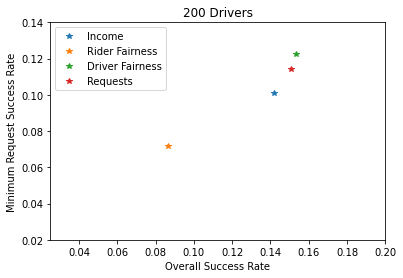

In [16]:
get_success_rate_plot([income_200, rider_200, driver_200, requests_200], labels, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200, (0.025, 0.200), (0.02, 0.14))

### 50 drivers

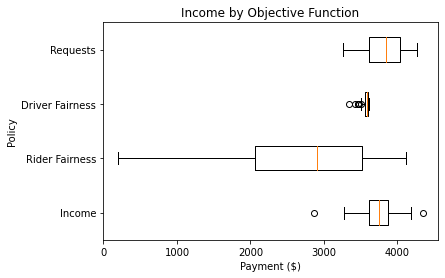

In [17]:
get_income_dist_plot([income_50, rider_50, driver_50, requests_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50)

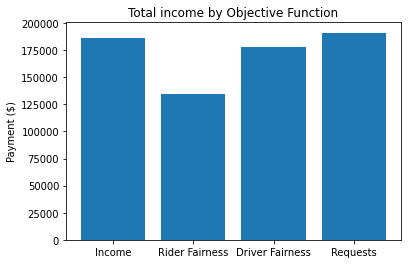

In [18]:
get_total_income_bar_plot([income_50, rider_50, driver_50, requests_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])

### 200 drivers

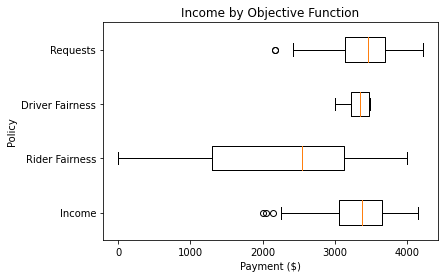

In [19]:
get_income_dist_plot([income_200, rider_200, driver_200, requests_200], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200)

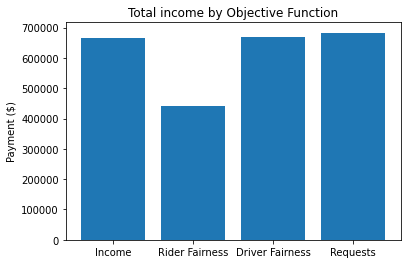

In [20]:
get_total_income_bar_plot([income_200, rider_200, driver_200, requests_200], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])

## Model without LSTM, original data

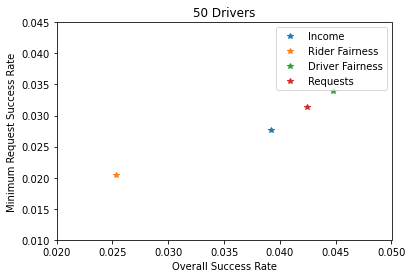

In [21]:
get_success_rate_plot([income_nolstm_50, rider_nolstm_50, driver_nolstm_50, requests_nolstm_50], labels, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50, (0.020, 0.050), (0.010, 0.045))

### 50 drivers

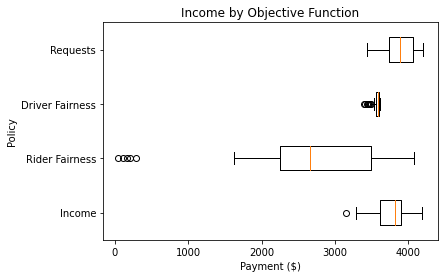

In [22]:
get_income_dist_plot([income_nolstm_50, rider_nolstm_50, driver_nolstm_50, requests_nolstm_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50)

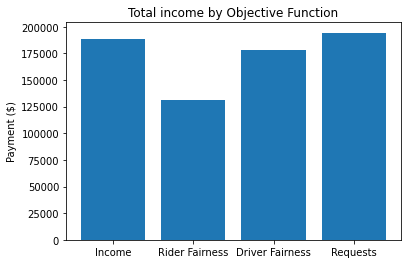

In [23]:
get_total_income_bar_plot([income_nolstm_50, rider_nolstm_50, driver_nolstm_50, requests_nolstm_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])

## Original model, replicated data

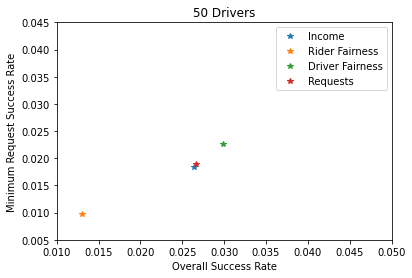

In [24]:
get_success_rate_plot([income_repl_50, rider_repl_50, driver_repl_50, requests_repl_50], labels_repl, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50, (0.010, 0.050), (0.005, 0.045))

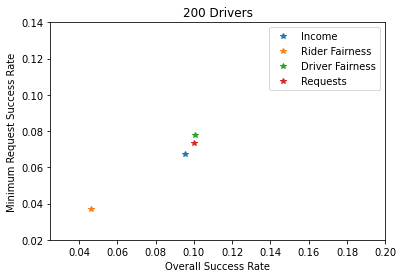

In [25]:
get_success_rate_plot([income_repl_200, rider_repl_200, driver_repl_200, requests_repl_200], labels_repl, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200, (0.025, 0.200), (0.02, 0.14))

### 50 drivers

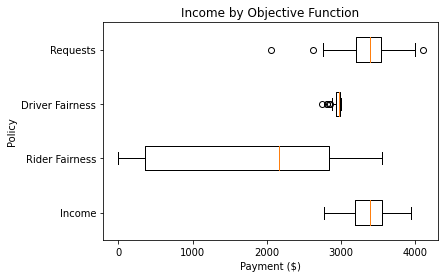

In [26]:
get_income_dist_plot([income_repl_50, rider_repl_50, driver_repl_50, requests_repl_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50)

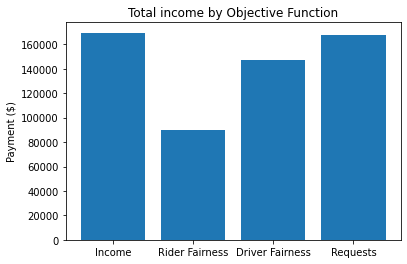

In [27]:
get_total_income_bar_plot([income_repl_50, rider_repl_50, driver_repl_50, requests_repl_50], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])

### 200 drivers

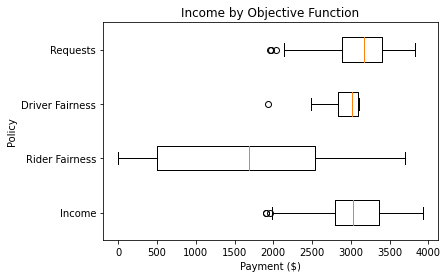

In [28]:
get_income_dist_plot([income_repl_200, rider_repl_200, driver_repl_200, requests_repl_200], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200)

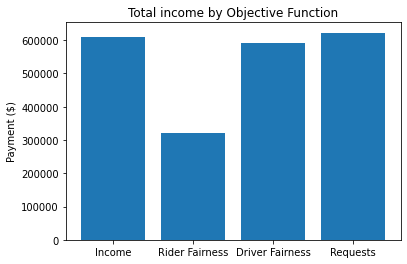

In [29]:
get_total_income_bar_plot([income_repl_200, rider_repl_200, driver_repl_200, requests_repl_200], ["Income", "Rider Fairness", "Driver Fairness", "Requests"])

## Original model, Brooklyn data

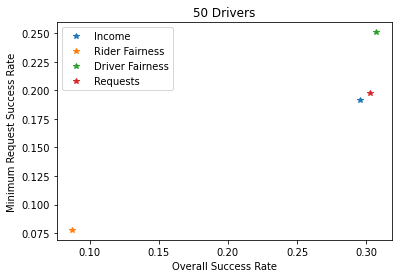

In [30]:
get_success_rate_plot([income_brook_50_a, rider_brook_50_a, driver_brook_50_a, requests_brook_50_a], labels_brook, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50, statsb=[income_brook_50_b, rider_brook_50_b, driver_brook_50_b, requests_brook_50_b])

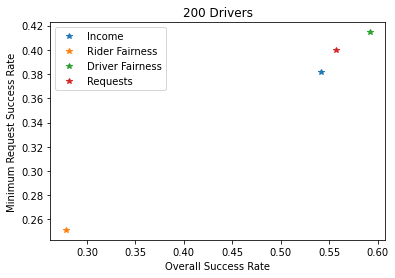

In [31]:
get_success_rate_plot([income_brook_200_a, rider_brook_200_a, driver_brook_200_a, requests_brook_200_a], labels_brook, ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200, statsb=[income_brook_200_b, rider_brook_200_b, driver_brook_200_b, requests_brook_200_b])

### 50 drivers

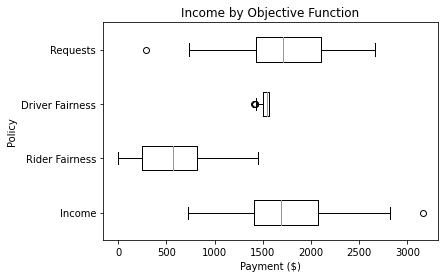

In [32]:
get_income_dist_plot([income_brook_50_a, rider_brook_50_a, driver_brook_50_a, requests_brook_50_a], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 50, statsb=[income_brook_50_b, rider_brook_50_b, driver_brook_50_b, requests_brook_50_b])

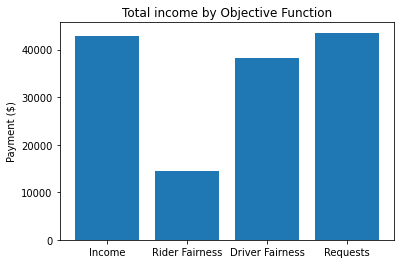

In [33]:
get_total_income_bar_plot([income_brook_50_a, rider_brook_50_a, driver_brook_50_a, requests_brook_50_a], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], statsb=[income_brook_50_b, rider_brook_50_b, driver_brook_50_b, requests_brook_50_b])

### 200 drivers

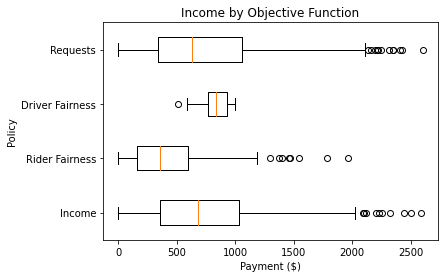

In [34]:
get_income_dist_plot([income_brook_200_a, rider_brook_200_a, driver_brook_200_a, requests_brook_200_a], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], 200, statsb=[income_brook_200_b, rider_brook_200_b, driver_brook_200_b, requests_brook_200_b])

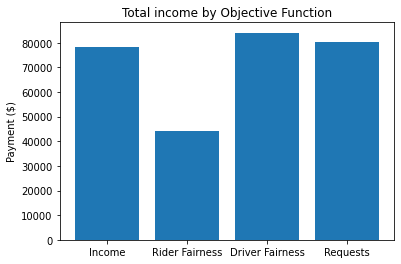

In [35]:
get_total_income_bar_plot([income_brook_200_a, rider_brook_200_a, driver_brook_200_a, requests_brook_200_a], ["Income", "Rider Fairness", "Driver Fairness", "Requests"], statsb=[income_brook_200_b, rider_brook_200_b, driver_brook_200_b, requests_brook_200_b])